
## Data Mining & Unsupervised Clustering on IMDB Movie Database
<p>Alwin Bethel 
<p>Sheila Tupker
<p>CS 5813.50 Data Warehousing and Data Mining 
<p>Fall 2018

The following were new algorithms and techniques to both Sheila and Alwin:
Unsupervised Clustering
Web Scraping
Text Mining (using components of Natural Language Processing)
PCA - Principal Component Analysis
The Elbow Method
K-Means Clustering

Data:
IMBD top 250 movies
www.imdb.com/chart/top





***Given that this data is pulling from an API
Each time this program runs it is quite possible that 
the results will be different depending on the it is run. 
Different movies, different rankings, different optimum cluster amount, etc.

In [1]:
import requests
from requests import get# web library for python and says - give me this file 
from bs4 import BeautifulSoup # this scrapes the web and pulls content out
import pandas as pd
import numpy as np 
import pprint #allows me to see the data structure ex. of a python array that is in a convienint panda
import operator 
from sklearn.decomposition import PCA

from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
#to scale the data so it is normalized in a specific range
from sklearn.preprocessing import StandardScaler 
#KMeans
from __future__ import print_function

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
#import seaborn as sns 
import datetime as dt
import string
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
#sns.set(style="ticks")
from sklearn import feature_extraction







In [2]:
#Top 250 movie id's from IMDB
#Web Scraping - reading the html code and finding all divs that have class
#wlb-ribbon
url = "http://www.imdb.com/chart/top"

page=get(url).content
soup = BeautifulSoup(page, "html.parser")
entries=soup.find_all(name ='div', attrs={'class':'wlb_ribbon'})

movie_ids = [c['data-tconst'] for c in entries]

In [3]:
#once I had the api key given to me
#I could access omdbapi to access imdb's info given to coders
#so I make a query for data and it in return sends me back data
movie_info=[[] for i in range(len(movie_ids))]

for i in range(250):
    url='http://www.omdbapi.com/?i='
    r=requests.get(url+movie_ids[i]+"&apikey=ac7679a&i").json()
    for a in r.keys():
        movie_info[i].append(r[a])
        
df_movies=pd.DataFrame(movie_info,columns=r.keys())

#let's see the movie results 
df_movies.head()

,Plot,Rated,Title,Ratings,DVD,Writer,Production,Actors,Type,imdbVotes,...,Genre,imdbRating,Language,Country,BoxOffice,Runtime,imdbID,Metascore,Response,Year
0,Two imprisoned men bond over a number of years...,R,The Shawshank Redemption,"[{u'Source': u'Internet Movie Database', u'Val...",27 Jan 1998,"Stephen King (short story ""Rita Hayworth and S...",Columbia Pictures,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",movie,"2,018,482",...,Drama,9.3,English,USA,N/A,142 min,tt0111161,80,True,1994
1,The aging patriarch of an organized crime dyna...,R,The Godfather,"[{u'Source': u'Internet Movie Database', u'Val...",09 Oct 2001,"Mario Puzo (screenplay by), Francis Ford Coppo...",Paramount Pictures,"Marlon Brando, Al Pacino, James Caan, Richard ...",movie,"1,386,576",...,"Crime, Drama",9.2,"English, Italian, Latin",USA,N/A,175 min,tt0068646,100,True,1972
2,The early life and career of Vito Corleone in ...,R,The Godfather: Part II,"[{u'Source': u'Internet Movie Database', u'Val...",24 May 2005,"Francis Ford Coppola (screenplay by), Mario Pu...",Paramount Pictures,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",movie,"958,116",...,"Crime, Drama",9.0,"English, Italian, Spanish, Latin, Sicilian",USA,N/A,202 min,tt0071562,90,True,1974
3,When the menace known as the Joker emerges fro...,PG-13,The Dark Knight,"[{u'Source': u'Internet Movie Database', u'Val...",09 Dec 2008,"Jonathan Nolan (screenplay), Christopher Nolan...",Warner Bros. Pictures/Legendary,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",movie,"1,990,170",...,"Action, Crime, Drama, Thriller",9.0,"English, Mandarin","USA, UK","$533,316,061",152 min,tt0468569,84,True,2008
4,A jury holdout attempts to prevent a miscarria...,APPROVED,12 Angry Men,"[{u'Source': u'Internet Movie Database', u'Val...",06 Mar 2001,"Reginald Rose (story), Reginald Rose (screenplay)",Criterion Collection,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",movie,"565,482",...,"Crime, Drama",8.9,English,USA,N/A,96 min,tt0050083,96,True,1957


In [4]:
#to get a closer look at plot for possible text mining
df_movies.iloc[1,0]

u'The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.'

In [5]:
#What data types are we working with?
df_movies.dtypes

Plot          object
Rated         object
Title         object
Ratings       object
DVD           object
Writer        object
Production    object
Actors        object
Type          object
imdbVotes     object
Website       object
Poster        object
Director      object
Released      object
Awards        object
Genre         object
imdbRating    object
Language      object
Country       object
BoxOffice     object
Runtime       object
imdbID        object
Metascore     object
Response      object
Year          object
dtype: object

In [6]:
#How many rows and columns?
df_movies.shape

(250, 25)

Time to Select Features


In [7]:
features = ['Title', 'Director','Actors', 'Genre', 'Production', 'Rated','Plot','Runtime','Year']

#subsetting out the newly chosen features into a new dataframe
dataFrame = df_movies.loc[:,features]

In [8]:
#viewing the newly created subsetted dataframe
dataFrame.head()

,Title,Director,Actors,Genre,Production,Rated,Plot,Runtime,Year
0,The Shawshank Redemption,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Drama,Columbia Pictures,R,Two imprisoned men bond over a number of years...,142 min,1994
1,The Godfather,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...","Crime, Drama",Paramount Pictures,R,The aging patriarch of an organized crime dyna...,175 min,1972
2,The Godfather: Part II,Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...","Crime, Drama",Paramount Pictures,R,The early life and career of Vito Corleone in ...,202 min,1974
3,The Dark Knight,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","Action, Crime, Drama, Thriller",Warner Bros. Pictures/Legendary,PG-13,When the menace known as the Joker emerges fro...,152 min,2008
4,12 Angry Men,Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....","Crime, Drama",Criterion Collection,APPROVED,A jury holdout attempts to prevent a miscarria...,96 min,1957


cleaning up data

In [9]:
#Reclassification:
#convert year to a categorical variable
#Break down years by recent 1 = (2000 and after) and 0 = (anything before 2000)
#Create a new column to hold this information

In [10]:
dataFrame['Recent'] = 0
dataFrame['Recent'] = dataFrame.Recent.astype(int)

dataFrame['Year'] = dataFrame.Year.astype(int)

dataFrame.loc[dataFrame.Year > 1999, 'Recent'] = 1

for i in range(250):
    dataFrame.Runtime[i]=dataFrame.Runtime[i].split()[0]

/Users/sheilatupker/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
#Let's see what is at the end of the dataFrame as well. 
dataFrame.tail()


,Title,Director,Actors,Genre,Production,Rated,Plot,Runtime,Year,Recent
245,Guardians of the Galaxy,James Gunn,"Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...","Action, Adventure, Comedy, Sci-Fi",Walt Disney Pictures,PG-13,A group of intergalactic criminals are forced ...,121,2014,1
246,8½,Federico Fellini,"Marcello Mastroianni, Claudia Cardinale, Anouk...",Drama,Cinerez,NOT RATED,A harried movie director retreats into his mem...,138,1963,0
247,Lagaan: Once Upon a Time in India,Ashutosh Gowariker,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...","Adventure, Drama, Musical, Romance, Sport",B4U Entertainment,PG,The people of a small village in Victorian Ind...,224,2001,1
248,Beauty and the Beast,"Gary Trousdale, Kirk Wise","Robby Benson, Jesse Corti, Rex Everhart, Angel...","Animation, Family, Fantasy, Musical, Romance",Buena Vista,G,A selfish prince is cursed to become a monster...,84,1991,0
249,The Bourne Ultimatum,Paul Greengrass,"Matt Damon, Julia Stiles, David Strathairn, Sc...","Action, Mystery, Thriller",Universal Pictures,PG-13,Jason Bourne dodges a ruthless C.I.A. official...,115,2007,1


In [12]:
#Year is also being replaced but with Recent
dataFrame.drop(['Year'], axis = 1, inplace = True)

In [13]:
#looks good!
dataFrame.head()


,Title,Director,Actors,Genre,Production,Rated,Plot,Runtime,Recent
0,The Shawshank Redemption,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Drama,Columbia Pictures,R,Two imprisoned men bond over a number of years...,142,0
1,The Godfather,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...","Crime, Drama",Paramount Pictures,R,The aging patriarch of an organized crime dyna...,175,0
2,The Godfather: Part II,Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...","Crime, Drama",Paramount Pictures,R,The early life and career of Vito Corleone in ...,202,0
3,The Dark Knight,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","Action, Crime, Drama, Thriller",Warner Bros. Pictures/Legendary,PG-13,When the menace known as the Joker emerges fro...,152,1
4,12 Angry Men,Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....","Crime, Drama",Criterion Collection,APPROVED,A jury holdout attempts to prevent a miscarria...,96,0


The following 3 cells includes definitions which prove to be helpful for the repetitve actions coming up.

In [14]:
'''
it takes the cleaned sorted list that was seperated by commas
and stores it into var name. It also creates dummy_name which is currently
an empty data frame. Then loops through the name var and 
for 'i' in name (the sorted list) it uses a "generator expression".
Now it will look for every row in the data_column and will re-split the row on
commas and looking to see if 'i' exists. If so it gets a 1 if not it gets a 0.
because it is in brackets it gets assigned as an array to the col i of dummy name.

namelist = this code is another "generator expression" surrounded by [] so being
put into an array/list. This is used as the index into dummy_name which sums
all of the items in the columns and sorts it by the nbr of times it appears.
Returning the index which includes the order of the columns by their sums but not the 
sum count itself. 
'''
def freqSort(column):
    name = splitting(column)
    splitDataFrame = pd.DataFrame()
    for i in name:
        splitDataFrame[i] = [int(i in nm.split(', ')) for nm in dataFrame[column]] 
    
    nameList = [i for i in name]
    tally = splitDataFrame[nameList].sum()
    tally = tally.sort_values(axis=0,ascending=False)
    return tally.index
    


In [15]:
'''
This is identical to def top except it calls plot.
If n_elm_display is not 0 then it is used to slice nlt
else it takes everything.
'''
def plotColumn(column,nbrElemDisplay = 0):
    name=splitting(column)
    splitDataFrame=pd.DataFrame()
    for i in name:
        splitDataFrame[i]=[int(i in nm.split(', ')) for nm in dataFrame[column]] 
    
    nameList = [i for i in name]
    tally = splitDataFrame[nameList].sum()
    tally = tally.sort_values(axis = 0,ascending = False)
    if nbrElemDisplay !=0:
        return tally[:nbrElemDisplay].plot(kind = "bar",figsize = (10,10))
    else:
        return tally[:].plot(kind = "bar",figsize = (10,5))
    
    

In [16]:
'''
working on a column it splits words on commas and returns them back seperated
then uses the sorted function to return the list of item
'''
def splitting(column):
    name=set()
    for name_string in dataFrame[column]:
        name.update(name_string.split(', '))
    name=sorted(name)
    return name

In [17]:
#pulling out all of the different Directors
dataFrame.Director.unique()

array([u'Frank Darabont', u'Francis Ford Coppola', u'Christopher Nolan',
       u'Sidney Lumet', u'Steven Spielberg', u'Peter Jackson',
       u'Quentin Tarantino', u'Sergio Leone', u'David Fincher',
       u'Robert Zemeckis', u'Irvin Kershner', u'Milos Forman',
       u'Martin Scorsese', u'Lana Wachowski, Lilly Wachowski',
       u'Akira Kurosawa',
       u'Fernando Meirelles, K\xe1tia Lund(co-director)', u'George Lucas',
       u'Jonathan Demme', u'Frank Capra', u'Roberto Benigni',
       u'Bryan Singer', u'Hayao Miyazaki, Kirk Wise', u'Luc Besson',
       u'Alfred Hitchcock', u'Tony Kaye', u'Charles Chaplin',
       u'Michael Curtiz', u'Roman Polanski',
       u'Olivier Nakache, \xc9ric Toledano', u'James Cameron',
       u'Damien Chazelle', u'Roger Allers, Rob Minkoff', u'Ridley Scott',
       u'Anthony Russo, Joe Russo', u'Giuseppe Tornatore',
       u'Isao Takahata', u'Billy Wilder',
       u'Florian Henckel von Donnersmarck', u'Stanley Kubrick',
       u'Andrew Stanton', u'Hayao

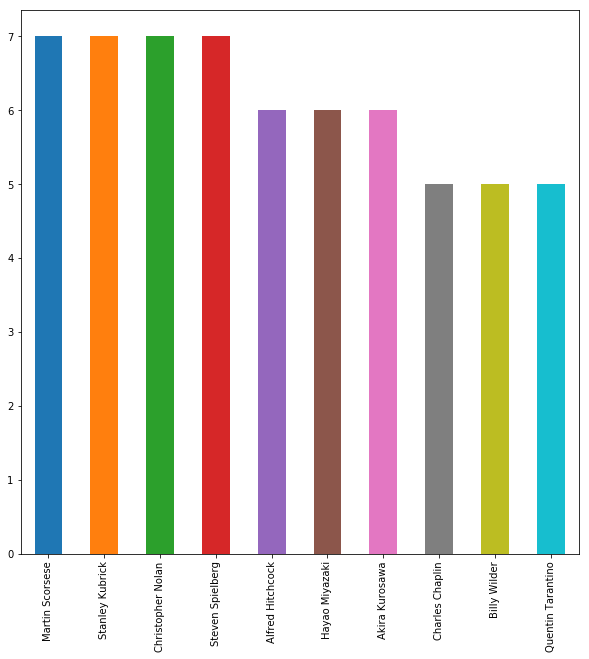

In [18]:
plotColumn('Director', 10)

In [19]:
#choosing to pull out the top 10 directors (from the top 250 movies)
#now each one of the top 10 directors is represented as their own feature
directors = freqSort('Director')
    
for director in directors[:10]:
    dataFrame["Director:"+director] = [int(director in d.split(', ')) for d in dataFrame.Director]

In [20]:
#view the dataframe with the updated top 10 director features
dataFrame.head()

,Title,Director,Actors,Genre,Production,Rated,Plot,Runtime,Recent,Director:Martin Scorsese,Director:Stanley Kubrick,Director:Christopher Nolan,Director:Steven Spielberg,Director:Alfred Hitchcock,Director:Hayao Miyazaki,Director:Akira Kurosawa,Director:Charles Chaplin,Director:Billy Wilder,Director:Quentin Tarantino
0,The Shawshank Redemption,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Drama,Columbia Pictures,R,Two imprisoned men bond over a number of years...,142,0,0,0,0,0,0,0,0,0,0,0
1,The Godfather,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...","Crime, Drama",Paramount Pictures,R,The aging patriarch of an organized crime dyna...,175,0,0,0,0,0,0,0,0,0,0,0
2,The Godfather: Part II,Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...","Crime, Drama",Paramount Pictures,R,The early life and career of Vito Corleone in ...,202,0,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","Action, Crime, Drama, Thriller",Warner Bros. Pictures/Legendary,PG-13,When the menace known as the Joker emerges fro...,152,1,0,0,1,0,0,0,0,0,0,0
4,12 Angry Men,Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....","Crime, Drama",Criterion Collection,APPROVED,A jury holdout attempts to prevent a miscarria...,96,0,0,0,0,0,0,0,0,0,0,0


In [21]:
#viewing each time of genre that is represented 
dataFrame.Genre.unique()

array([u'Drama', u'Crime, Drama', u'Action, Crime, Drama, Thriller',
       u'Biography, Drama, History', u'Action, Adventure, Drama, Fantasy',
       u'Western', u'Adventure, Drama, Fantasy', u'Drama, Romance',
       u'Action, Adventure, Fantasy, Sci-Fi',
       u'Action, Adventure, Sci-Fi, Thriller', u'Action, Sci-Fi',
       u'Adventure, Drama', u'Crime, Drama, Mystery, Thriller',
       u'Crime, Drama, Thriller', u'Drama, Family, Fantasy',
       u'Comedy, Drama, Romance, War', u'Crime, Mystery, Thriller',
       u'Animation, Adventure, Family, Fantasy, Mystery', u'Drama, War',
       u'Crime, Drama, Fantasy, Mystery', u'Adventure, Drama, Sci-Fi',
       u'Horror, Mystery, Thriller', u'Comedy, Drama, Romance',
       u'Drama, Romance, War', u'Comedy, Drama, Family, Romance',
       u'Biography, Drama, Music, War', u'Biography, Comedy, Drama',
       u'Adventure, Comedy, Sci-Fi', u'Drama, Music',
       u'Mystery, Thriller', u'Action, Adventure',
       u'Animation, Adventure, Dram

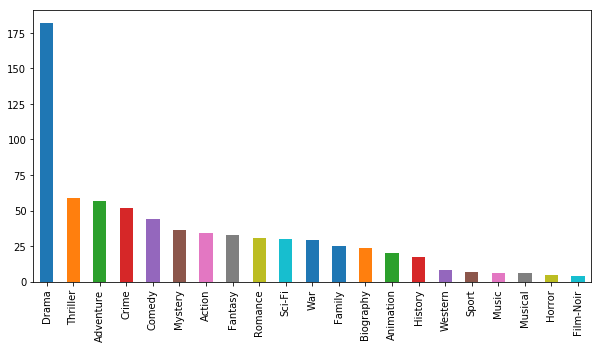

In [22]:
#whew, drama far exceeds the other genres in the top 250 movies
plotColumn('Genre')

In [23]:
#Get the unique genres contained in the dataframe
genres = splitting('Genre')
#Add one column/feature for every genre in the dataframe
for genre in genres:
    dataFrame["genre:"+genre] = [int(genre in g.split(', ')) for g in dataFrame.Genre]

In [24]:
#Wanting to view the '...' data just to check it - 
#I have so many columns so difficult to distinguish indexes so use.loc and the col name - cool!
dataFrame.loc[:,'Director:Steven Spielberg':'genre:Horror']


,Director:Steven Spielberg,Director:Alfred Hitchcock,Director:Hayao Miyazaki,Director:Akira Kurosawa,Director:Charles Chaplin,Director:Billy Wilder,Director:Quentin Tarantino,genre:Action,genre:Adventure,genre:Animation,genre:Biography,genre:Comedy,genre:Crime,genre:Drama,genre:Family,genre:Fantasy,genre:Film-Noir,genre:History,genre:Horror
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
6,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [25]:
#now viewing the standard data frame with the ...
dataFrame.head()

,Title,Director,Actors,Genre,Production,Rated,Plot,Runtime,Recent,Director:Martin Scorsese,...,genre:Horror,genre:Music,genre:Musical,genre:Mystery,genre:Romance,genre:Sci-Fi,genre:Sport,genre:Thriller,genre:War,genre:Western
0,The Shawshank Redemption,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Drama,Columbia Pictures,R,Two imprisoned men bond over a number of years...,142,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...","Crime, Drama",Paramount Pictures,R,The aging patriarch of an organized crime dyna...,175,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Godfather: Part II,Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...","Crime, Drama",Paramount Pictures,R,The early life and career of Vito Corleone in ...,202,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","Action, Crime, Drama, Thriller",Warner Bros. Pictures/Legendary,PG-13,When the menace known as the Joker emerges fro...,152,1,0,...,0,0,0,0,0,0,0,1,0,0
4,12 Angry Men,Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....","Crime, Drama",Criterion Collection,APPROVED,A jury holdout attempts to prevent a miscarria...,96,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#listing all of the different types of ratings
dataFrame.Rated.unique()

array([u'R', u'PG-13', u'APPROVED', u'PG', u'NOT RATED', u'G', u'PASSED',
       u'N/A', u'GP'], dtype=object)

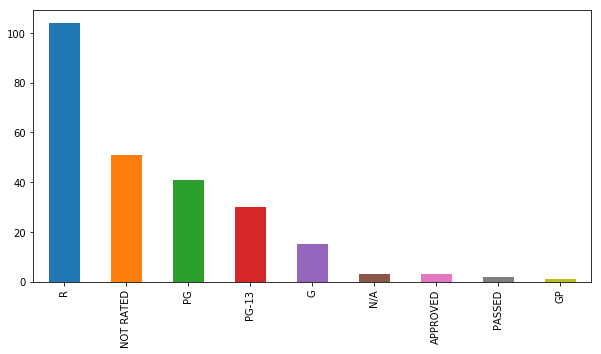

In [27]:
#visually we can see that rated R movies excel in the top 250 movies
plotColumn('Rated')

In [28]:
#Get the unique Ratings contained in the dataframe
ratings = splitting('Rated')
#Add one column/feature for every unique Ratings in the dataframe
for i in ratings:
    dataFrame["Rating:"+i] = [int(i in r.split(', ')) for r in dataFrame.Rated]
    
    

In [29]:
#view the dataframe with the newly added ratings as features
dataFrame.head()

,Title,Director,Actors,Genre,Production,Rated,Plot,Runtime,Recent,Director:Martin Scorsese,...,genre:Western,Rating:APPROVED,Rating:G,Rating:GP,Rating:N/A,Rating:NOT RATED,Rating:PASSED,Rating:PG,Rating:PG-13,Rating:R
0,The Shawshank Redemption,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Drama,Columbia Pictures,R,Two imprisoned men bond over a number of years...,142,0,0,...,0,0,0,0,0,0,0,0,0,1
1,The Godfather,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...","Crime, Drama",Paramount Pictures,R,The aging patriarch of an organized crime dyna...,175,0,0,...,0,0,0,0,0,0,0,0,0,1
2,The Godfather: Part II,Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...","Crime, Drama",Paramount Pictures,R,The early life and career of Vito Corleone in ...,202,0,0,...,0,0,0,0,0,0,0,0,0,1
3,The Dark Knight,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","Action, Crime, Drama, Thriller",Warner Bros. Pictures/Legendary,PG-13,When the menace known as the Joker emerges fro...,152,1,0,...,0,0,0,0,0,0,0,0,1,0
4,12 Angry Men,Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....","Crime, Drama",Criterion Collection,APPROVED,A jury holdout attempts to prevent a miscarria...,96,0,0,...,0,1,0,0,0,0,0,0,0,0


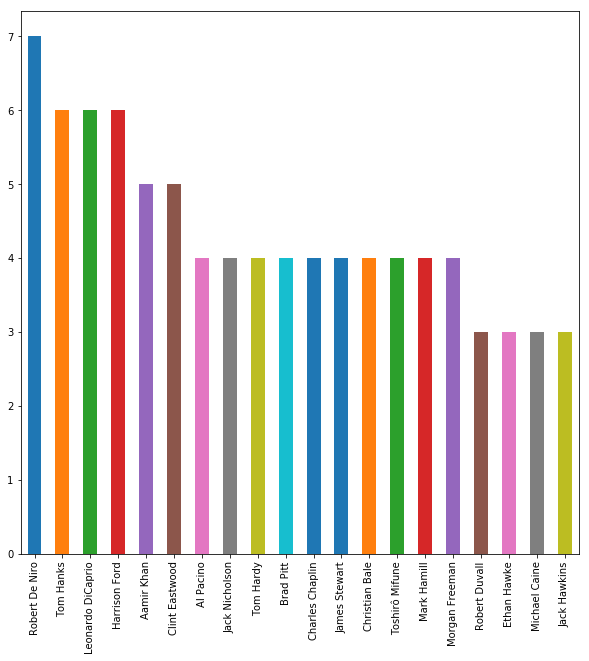

In [30]:
#Oldie but goodie Robert Deniro wins out as top actor in the to 250 movies
#but really all of these actors are similarlily represented by just 1 to three movies
plotColumn('Actors',20)

In [31]:
#Adding the top 20 actors to our dataset
actors=freqSort('Actors')

for i in actors[:20]:
    dataFrame["Actor:"+i] = [int(i in a.split(', ')) for a in dataFrame.Actors]

In [32]:
#now viewing the data frame with the newly added 20 features of the top actors 
dataFrame.head()

,Title,Director,Actors,Genre,Production,Rated,Plot,Runtime,Recent,Director:Martin Scorsese,...,Actor:Charles Chaplin,Actor:James Stewart,Actor:Christian Bale,Actor:Toshirô Mifune,Actor:Mark Hamill,Actor:Morgan Freeman,Actor:Robert Duvall,Actor:Ethan Hawke,Actor:Michael Caine,Actor:Jack Hawkins
0,The Shawshank Redemption,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Drama,Columbia Pictures,R,Two imprisoned men bond over a number of years...,142,0,0,...,0,0,0,0,0,1,0,0,0,0
1,The Godfather,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...","Crime, Drama",Paramount Pictures,R,The aging patriarch of an organized crime dyna...,175,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Godfather: Part II,Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...","Crime, Drama",Paramount Pictures,R,The early life and career of Vito Corleone in ...,202,0,0,...,0,0,0,0,0,0,1,0,0,0
3,The Dark Knight,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","Action, Crime, Drama, Thriller",Warner Bros. Pictures/Legendary,PG-13,When the menace known as the Joker emerges fro...,152,1,0,...,0,0,1,0,0,0,0,0,1,0
4,12 Angry Men,Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....","Crime, Drama",Criterion Collection,APPROVED,A jury holdout attempts to prevent a miscarria...,96,0,0,...,0,0,0,0,0,0,0,0,0,0


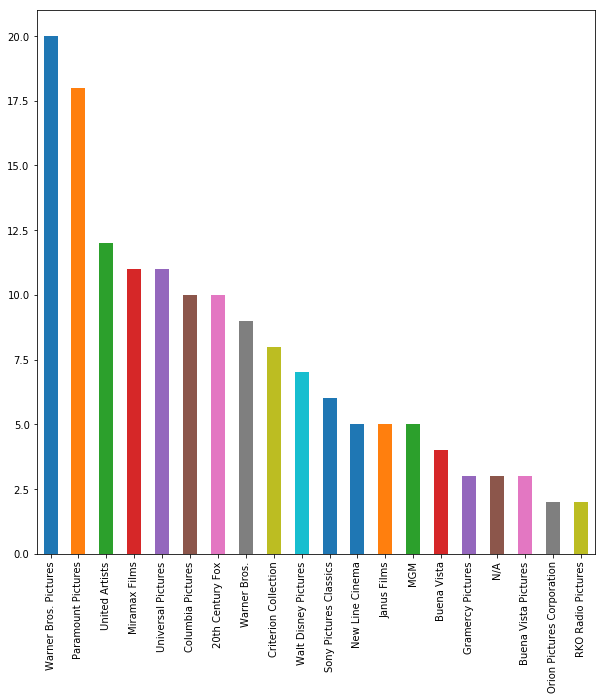

In [33]:
#Visually viewing the top 20 production companies and where they fall compared to
#one another
plotColumn('Production',20)

In [34]:
#Adding top 20 Production to our dataset
production=freqSort('Production')

for i in production[:20]:
    dataFrame["Production:"+i] = [int(i in p.split(', ')) for p in dataFrame.Production]

In [35]:
#viewing the newly added 20 data features representing the top 20 production companies
dataFrame.head()

,Title,Director,Actors,Genre,Production,Rated,Plot,Runtime,Recent,Director:Martin Scorsese,...,Production:Sony Pictures Classics,Production:New Line Cinema,Production:Janus Films,Production:MGM,Production:Buena Vista,Production:Gramercy Pictures,Production:N/A,Production:Buena Vista Pictures,Production:Orion Pictures Corporation,Production:RKO Radio Pictures
0,The Shawshank Redemption,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Drama,Columbia Pictures,R,Two imprisoned men bond over a number of years...,142,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...","Crime, Drama",Paramount Pictures,R,The aging patriarch of an organized crime dyna...,175,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Godfather: Part II,Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...","Crime, Drama",Paramount Pictures,R,The early life and career of Vito Corleone in ...,202,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","Action, Crime, Drama, Thriller",Warner Bros. Pictures/Legendary,PG-13,When the menace known as the Joker emerges fro...,152,1,0,...,0,0,0,0,0,0,0,0,0,0
4,12 Angry Men,Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....","Crime, Drama",Criterion Collection,APPROVED,A jury holdout attempts to prevent a miscarria...,96,0,0,...,0,0,0,0,0,0,0,0,0,0


Analyzing the plot variable. It is large which makes things more difficult because the plot has more a longer length. 

Text Mining Section


In [36]:
#Here we are turning plot inot a list/array and getting rid of all of the punctuation
#and making sure it is lower case, next we are sorting each of the words in the list
#by frequency


storyLine=list(dataFrame['Plot'])
temp=""
for i in storyLine:
        temp= temp + i
temp.replace(".", " ").replace(",", "")
temp=temp.split(" ")
'''
map - first parameter is a function. Lambda was used to say use 'this made up
on the fly function". This function takes in x and it returns x.lower()
map applies the function to everything that is in temp.
'''
temp=map(lambda x:x.lower(),temp)
'''
A dictionary is produced to hold the count of each item and stored in freq.
The 'u' in the output is pythons' way of saying this is a unicode string.
It is sorting on the second column and outputting this list from largest to smallest.

'''
freq={i:temp.count(i) for i in set(temp)}
sortIt = sorted(freq.items(), key=operator.itemgetter(1), reverse=True)
sortIt




[(u'a', 318),
 (u'the', 305),
 (u'to', 208),
 (u'of', 195),
 (u'and', 186),
 (u'his', 137),
 (u'in', 117),
 (u'is', 58),
 (u'an', 56),
 (u'for', 53),
 (u'with', 52),
 (u'from', 50),
 (u'on', 43),
 (u'their', 42),
 (u'by', 40),
 (u'who', 34),
 (u'he', 34),
 (u'that', 30),
 (u'young', 30),
 (u'as', 27),
 (u'man', 26),
 (u'her', 26),
 (u'into', 22),
 (u'war', 21),
 (u'after', 20),
 (u'they', 19),
 (u'against', 19),
 (u'two', 19),
 (u'help', 19),
 (u'are', 19),
 (u'find', 18),
 (u'life', 17),
 (u'has', 17),
 (u'while', 17),
 (u'one', 16),
 (u'but', 16),
 (u'world', 15),
 (u'be', 15),
 (u'at', 15),
 (u'new', 14),
 (u'up', 14),
 (u'him', 13),
 (u'when', 12),
 (u'must', 11),
 (u'them', 11),
 (u'old', 11),
 (u'woman', 11),
 (u'during', 11),
 (u'finds', 11),
 (u'have', 11),
 (u'other', 11),
 (u'over', 10),
 (u'-', 10),
 (u'tries', 10),
 (u'its', 10),
 (u'himself', 10),
 (u'each', 9),
 (u'son', 9),
 (u'only', 9),
 (u'former', 9),
 (u'out', 9),
 (u'boy', 8),
 (u'love', 8),
 (u'family', 8),
 (u'th

In [37]:
#just to get an update on the current count of columns/features in my dataframe
dataFrame.shape

(250, 89)

In [38]:
#from the list of word frequencies created above, we are choosing
#the following words that are frequent and interesting (a mix of verbs and nouns)
#to search for in the movie plots.
wordsOfInterest = ['man', 'boy', 'him',
                   'woman', 'girl', 'her',
                   'love', 'war', 'journey',
                   'murder', 'friendship', 'police'
                   'battle', 'beautiful', 'team',
                   'detective', 'fight', 'death', 
                   'crime', 'struggles', 'family']

In [39]:
#goes through my words of interest and places them into the dataframe as a new plot 
#which is then made into features
def discoverPlot(x):
    temp = x
    temp.replace(".", " ").replace(",", "")
    temp=temp.split(" ")
    temp=map(lambda x:x.lower(),temp)
    words=[]
    for i in wordsOfInterest:
        if i in temp:
            words.append(i)
    return words
dataFrame['plotNew']=dataFrame['Plot'].apply(discoverPlot)
def wordExist (x):
    if i in x:
        return 1
    else:
        return 0
#go through each word that is interesting and create a new feature for it
for i in wordsOfInterest :
    dataFrame[i]=dataFrame['plotNew'].apply(wordExist)


In [40]:
#now we can see all of the chosen words (as features now) and their count values
dataFrame.head()

,Title,Director,Actors,Genre,Production,Rated,Plot,Runtime,Recent,Director:Martin Scorsese,...,friendship,policebattle,beautiful,team,detective,fight,death,crime,struggles,family
0,The Shawshank Redemption,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Drama,Columbia Pictures,R,Two imprisoned men bond over a number of years...,142,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...","Crime, Drama",Paramount Pictures,R,The aging patriarch of an organized crime dyna...,175,0,0,...,0,0,0,0,0,0,0,1,0,0
2,The Godfather: Part II,Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...","Crime, Drama",Paramount Pictures,R,The early life and career of Vito Corleone in ...,202,0,0,...,0,0,0,0,0,0,0,1,0,1
3,The Dark Knight,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","Action, Crime, Drama, Thriller",Warner Bros. Pictures/Legendary,PG-13,When the menace known as the Joker emerges fro...,152,1,0,...,0,0,0,0,0,1,0,0,0,0
4,12 Angry Men,Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....","Crime, Drama",Criterion Collection,APPROVED,A jury holdout attempts to prevent a miscarria...,96,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#Reclassyfing Runtime into an integer
dataFrame['Runtime'] = dataFrame.Runtime.astype(int)
print(dataFrame.shape)

#dropping all of original columns that are no longer needed
lastDataFrame = dataFrame.drop(['Director', 'Actors','Genre','Production','Rated','Plot','plotNew'], axis = 1)

#giving one last look at the data types to make sure they are all 
#type integers before moving forward.
#Houston, we have a go.
lastDataFrame.dtypes

(250, 110)


Title                                    object
Runtime                                   int64
Recent                                    int64
Director:Martin Scorsese                  int64
Director:Stanley Kubrick                  int64
Director:Christopher Nolan                int64
Director:Steven Spielberg                 int64
Director:Alfred Hitchcock                 int64
Director:Hayao Miyazaki                   int64
Director:Akira Kurosawa                   int64
Director:Charles Chaplin                  int64
Director:Billy Wilder                     int64
Director:Quentin Tarantino                int64
genre:Action                              int64
genre:Adventure                           int64
genre:Animation                           int64
genre:Biography                           int64
genre:Comedy                              int64
genre:Crime                               int64
genre:Drama                               int64
genre:Family                            

In [42]:
#chacking nbr of rows and cols again
lastDataFrame.shape

(250, 103)

PCA

In [43]:
'''
PCA - Principal Componenet Anlaysis
tells you which features have the most importance 
it reduces the demensionality of our dataset.
'''

#running this code to remove title from our dataframe and it works.
lastDataFrame.iloc[:,1:]

,Runtime,Recent,Director:Martin Scorsese,Director:Stanley Kubrick,Director:Christopher Nolan,Director:Steven Spielberg,Director:Alfred Hitchcock,Director:Hayao Miyazaki,Director:Akira Kurosawa,Director:Charles Chaplin,...,friendship,policebattle,beautiful,team,detective,fight,death,crime,struggles,family
0,142,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,175,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,202,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,152,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,96,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,195,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,201,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,154,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,178,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,139,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [55]:
#Everything but the title is being placed into the variable X
X = np.matrix(lastDataFrame.iloc[:,1:])

#now it will get standardized using standardScaler
#Normalizing the data to level the playing field of all values
scaler = StandardScaler()
X = scaler.fit_transform(X)

#now PCA runs on it
pca = PCA().fit(X)
top_PCA=["%.2f" % a for a in pca.explained_variance_ratio_ if a >= 0.01]

#len(top_PCA)sumall=sum(pca.explained_variance_ratio_)
sumall=sum(pca.explained_variance_ratio_)
pcaComponents = PCA(n_components=len(top_PCA)).fit(X)
sumComponents=sum(pcaComponents.explained_variance_ratio_)
print(('Warning Label: These numbers will change with each run of this code.'))
print(len(top_PCA))
print (top_PCA)
print (sumComponents/sumall)

Warning Label: These numbers will change with each run of this code.
40
['0.05', '0.04', '0.03', '0.03', '0.03', '0.03', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01']
0.7238499724230112


These 40 components explain 72.26% of the variance in the data.
The above information is telling us that the first value in this list is giving 5% of the variance.
**these are the features that best summarize the distance between the points


In [56]:
#calculates the weights for each feature and ranks them
#most important features according to PCA
firstComp = pcaComponents.components_[0]
firstComps = pd.DataFrame(zip(firstComp, lastDataFrame.columns), columns=['weights', 'features'])
firstComps['abs_weights']=firstComps['weights'].apply(lambda x: np.abs(x))
firstComps.sort_values('abs_weights', ascending=False, inplace = True)

firstComps


,weights,features,abs_weights
14,0.333091,genre:Adventure,0.333091
20,0.314198,genre:Family,0.314198
19,0.304835,genre:Drama,0.304835
13,0.263221,genre:Action,0.263221
18,-0.240455,genre:Crime,0.240455
34,0.222716,Rating:APPROVED,0.222716
41,-0.218766,Rating:PG-13,0.218766
7,0.200442,Director:Alfred Hitchcock,0.200442
71,0.196732,Production:Criterion Collection,0.196732
76,0.192199,Production:MGM,0.192199


CLUSTERING TIME


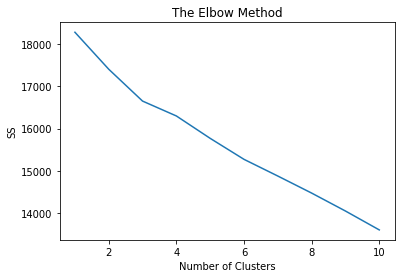

In [57]:
%matplotlib inline

#renaming X to xpca because we want our kmeans to only include the newly found
#import features from pca.
Xpca = pcaComponents.transform(X)
ss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(Xpca)
    ss.append(kmeans.inertia_)

#The Elbow Method is used to determine the optimum number of clusters
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SS')
plt.show()
    

In [58]:
#KMeans Clustering
#Clustering with kmeans as k=8
#The elbow moves everytime I run this code. 

kmeans=MiniBatchKMeans(n_clusters=8,init='k-means++',max_iter=500,n_init=1000,init_size=1000,batch_size=1000,
                  verbose=False)
kmeans_model=kmeans.fit(Xpca)
kmeanlabels=kmeans.labels_
kmeanclusters = kmeans.predict(Xpca)
kmeandistances = kmeans.transform(Xpca)



In [59]:
#Wanting to view how many movies belong to each of the 8 clusters 
#sorted by descending order of nbr of movies per a cluster
films_kmeans = { 'title': list(lastDataFrame.Title), 'rank': np.arange(0,250,1),'cluster': kmeanlabels}

frame_kmeans = pd.DataFrame(films_kmeans, index = [kmeanlabels] , columns = ['rank', 'title', 'cluster'])

frame_kmeans['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

0    182
2     24
3     19
1      7
4      6
7      4
6      4
5      4
Name: cluster, dtype: int64

In [66]:
#KMeans
#Instead of showing the clusters visually, listing each cluster with its associated features.

print("Top terms per each cluster:")
print()
#sort cluster centers by proximity to centroid.

#returns the integers that when looked up in the original array reprepresent
#the sort order. So instead of sorting the array this gives the indices
#without going through the process of actual sorting.
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1] 

'''
Going through 8 times and listing my clusters
print 

'''
for i in range(8):
    print("Cluster %d words:" % i, end='')
#ix is the older version of iloc or loc 
#ind is for index which I think is a key word therefore ind
#printing the major components of each cluster - top 5
    for ind in order_centroids[i, :5]: 
        print(' %s' % firstComps['features'].ix[ind], end=',')
    print('\n\n')

#printing all the titles in the cluster
    print("Cluster %d titles:" % i, end='')
    for title in frame_kmeans.ix[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print('\n\n')
   
    
print()

Top terms per each cluster:

Cluster 0 words: genre:Romance, genre:Sci-Fi, Director:Akira Kurosawa, genre:Adventure, genre:Music,


Cluster 0 titles: The Shawshank Redemption, The Godfather, The Godfather: Part II, 12 Angry Men, Schindler's List, Pulp Fiction, The Good, the Bad and the Ugly, Fight Club, Forrest Gump, One Flew Over the Cuckoo's Nest, Goodfellas, The Matrix, City of God, Se7en, The Silence of the Lambs, It's a Wonderful Life, Life Is Beautiful, The Usual Suspects, Léon: The Professional, The Green Mile, American History X, City Lights, Once Upon a Time in the West, Casablanca, The Pianist, The Intouchables, The Departed, Terminator 2: Judgment Day, Whiplash, Gladiator, Apocalypse Now, Memento, Alien, Cinema Paradiso, Grave of the Fireflies, The Lives of Others, Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb, Paths of Glory, The Shining, Django Unchained, American Beauty, Oldboy, Once Upon a Time in America, Das Boot, Citizen Kane, Braveheart, Reserv

/Users/sheilatupker/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/sheilatupker/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [61]:
#The End